<a href="https://colab.research.google.com/github/goz1985/Data_Science_Practical_Zetech/blob/main/Bank_Churn_RF_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing files from my local machine to my google colab notebook
from google.colab import files
upload = files.upload()

Saving Customer-Churn-Records.csv to Customer-Churn-Records (1).csv


In [2]:
import pandas as pd
churn = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
churn.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [5]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
churn.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [7]:
churn.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
churn.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

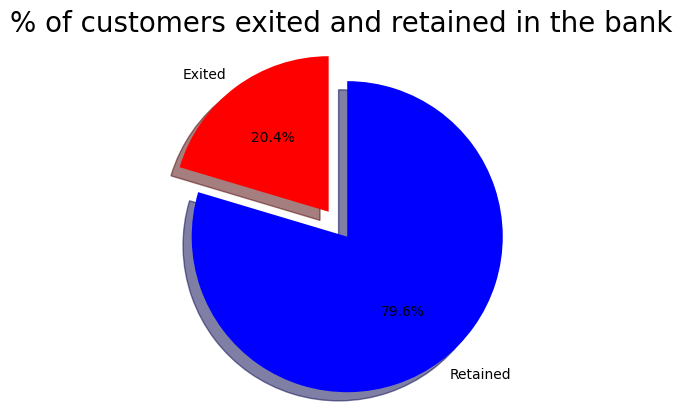

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Exited', 'Retained']
sizes = [churn.Exited[churn['Exited']==1].count(),churn.Exited[churn['Exited']==0].count()]
explode = [0.1,0]

# creat the pie chart to plot the Exited column
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5,colors=['r','b'],)
plt.title("% of customers exited and retained in the bank", size =20)
plt.axis('equal')
plt.show()


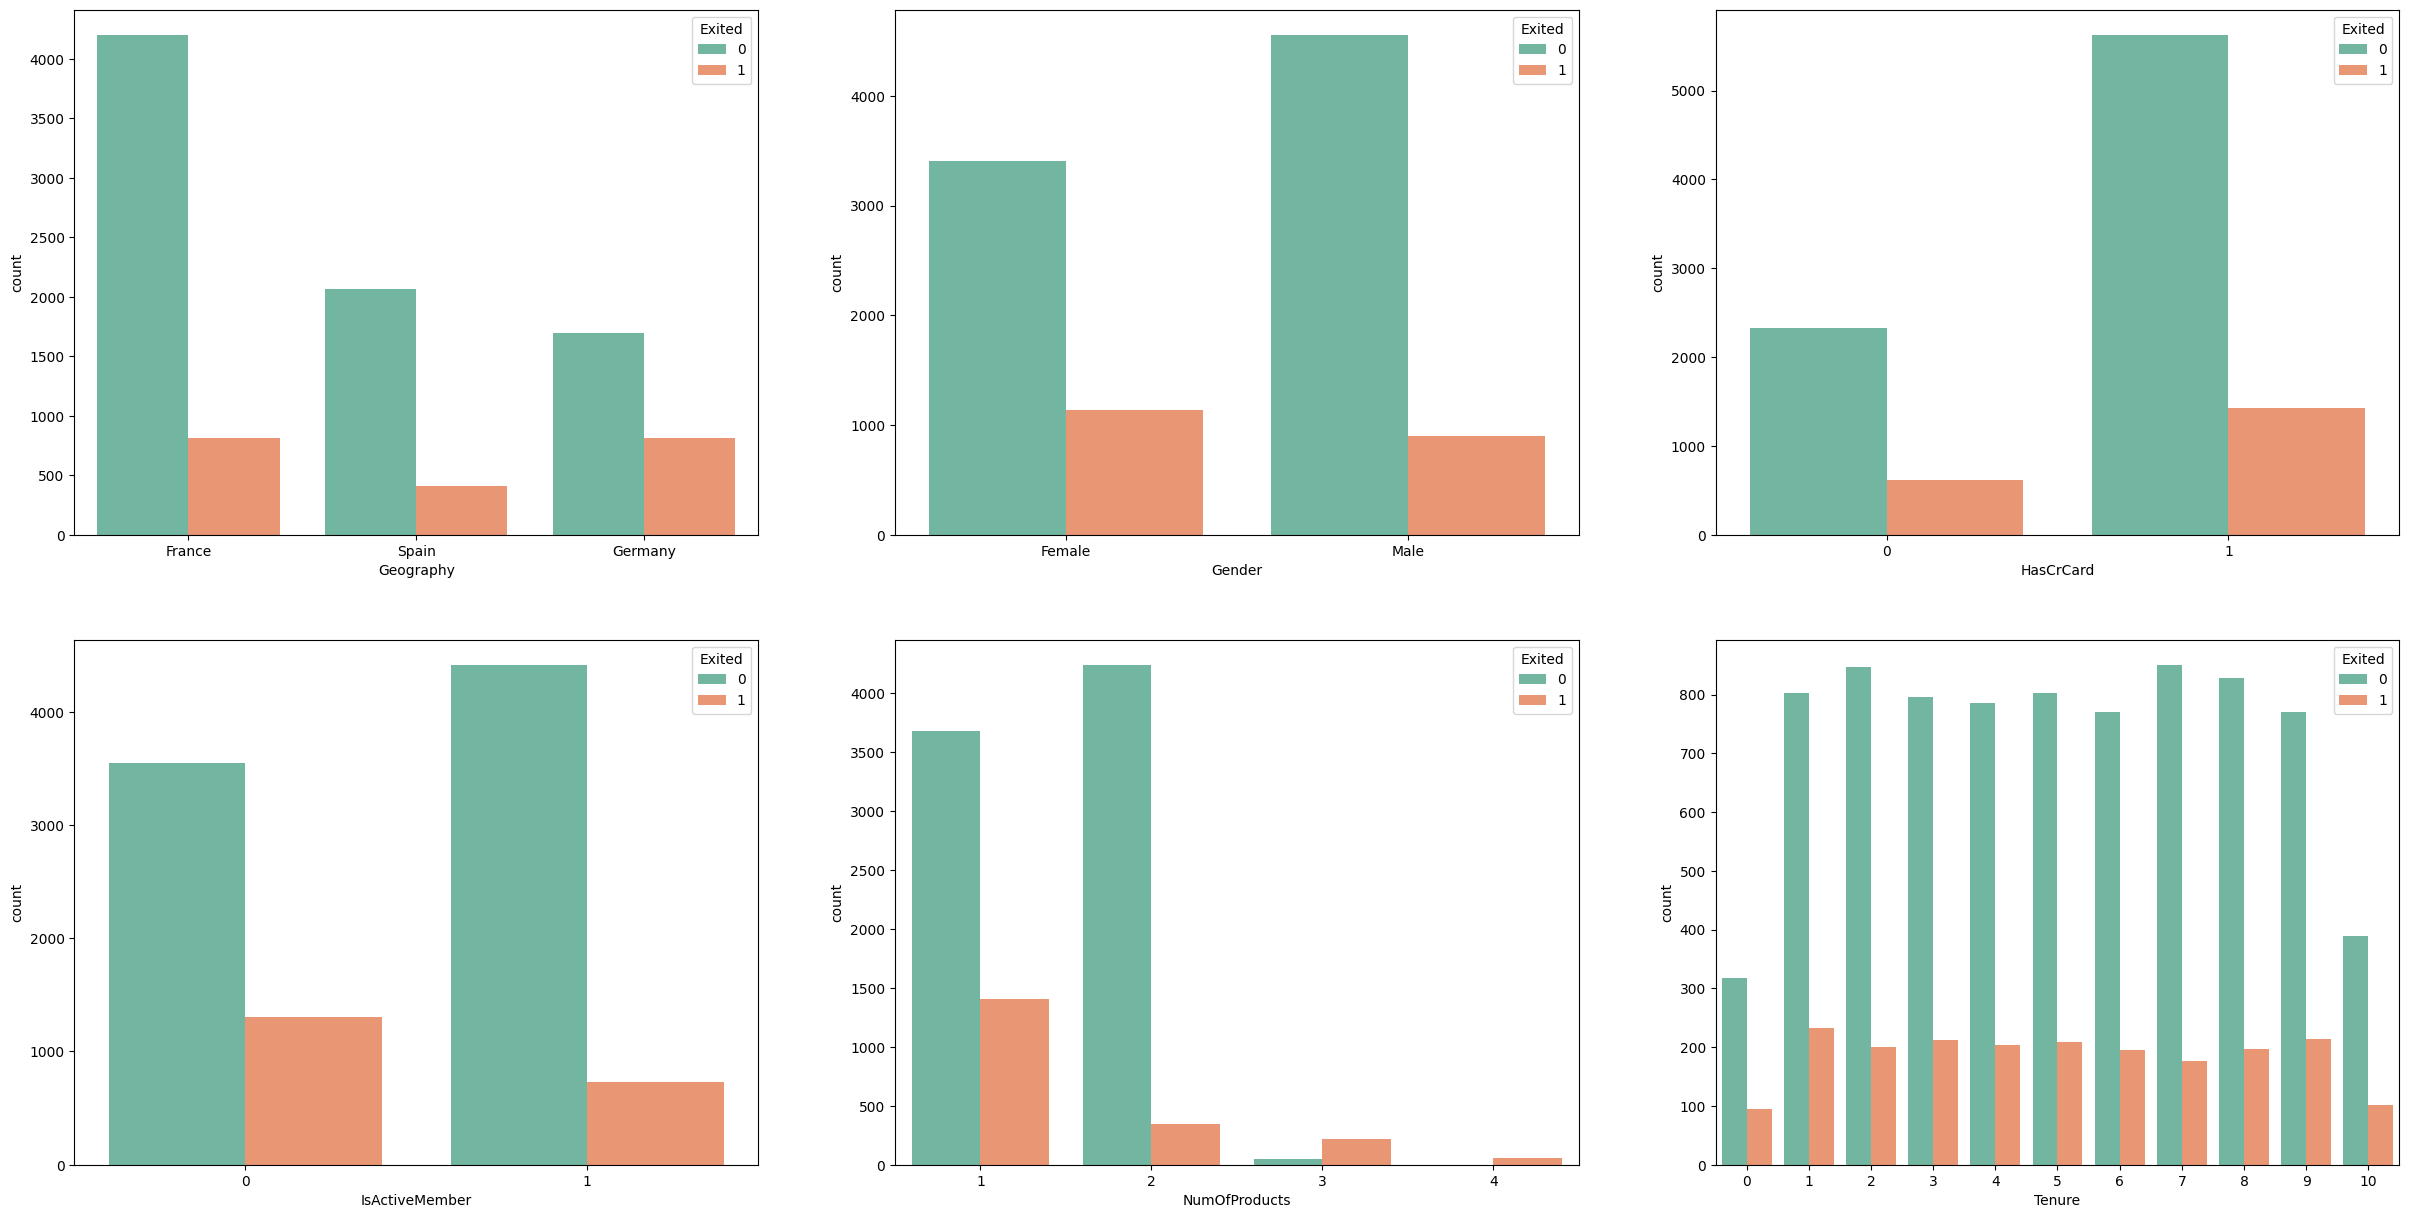

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
sns.countplot(x='Geography', hue='Exited',data=churn,palette='Set2',ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited',data=churn,palette='Set2',ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited',data=churn,palette='Set2',ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited',data=churn,palette='Set2',ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited',data=churn,palette='Set2',ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited',data=churn,palette='Set2',ax=ax[1][2])
#sns.countplot(x='Age', hue='Exited',data=churn,palette='Set2',ax=ax[0][3])
#sns.countplot(x='Complain', hue='Exited',data=churn,palette='Set2',ax=ax[1][4])

plt.show()

In [11]:
# prompt: Check for missing values in the churn dataset

churn.isnull().sum()


CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
# Perform One hot encoding
churn_dummies = pd.get_dummies(churn)

In [14]:
churn_dummies.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
Gender_Female           uint8
Gender_Male             uint8
Card Type_DIAMOND       uint8
Card Type_GOLD          uint8
Card Type_PLATINUM      uint8
Card Type_SILVER        uint8
dtype: object

In [19]:
churn_dummies.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [15]:
# prompt: split the dataset in 70% training and 30% testing

# Split the dataset into training and testing sets
X = churn_dummies.drop('Exited', axis=1)
y = churn_dummies['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# prompt: Run a random forest model on the train set and evaluate with the test, then compute accuracy, precision, ROC and AUC metrics

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)


Accuracy: 0.9986666666666667
Precision: 0.9948805460750854
ROC AUC: 0.9985229746892861


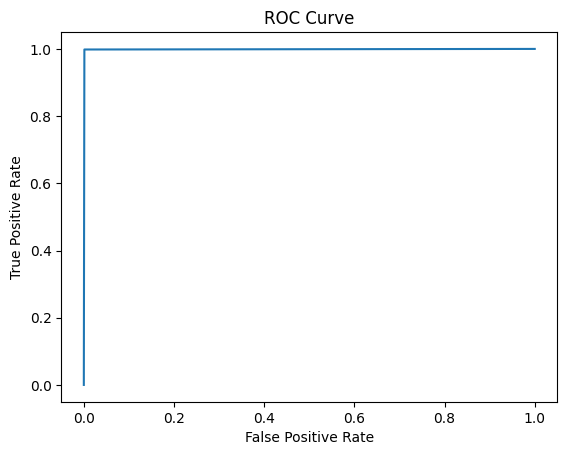

In [17]:
# prompt: Print the ROC curve for the model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the false positive rate (fpr) and true positive rate (tpr) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [18]:
# prompt: Print the confusion matrix for the random forest model

cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2413    3]
 [   1  583]]


Accuracy: 0.9966666666666667
Precision: 0.9914383561643836
ROC AUC: 0.9946844098702712


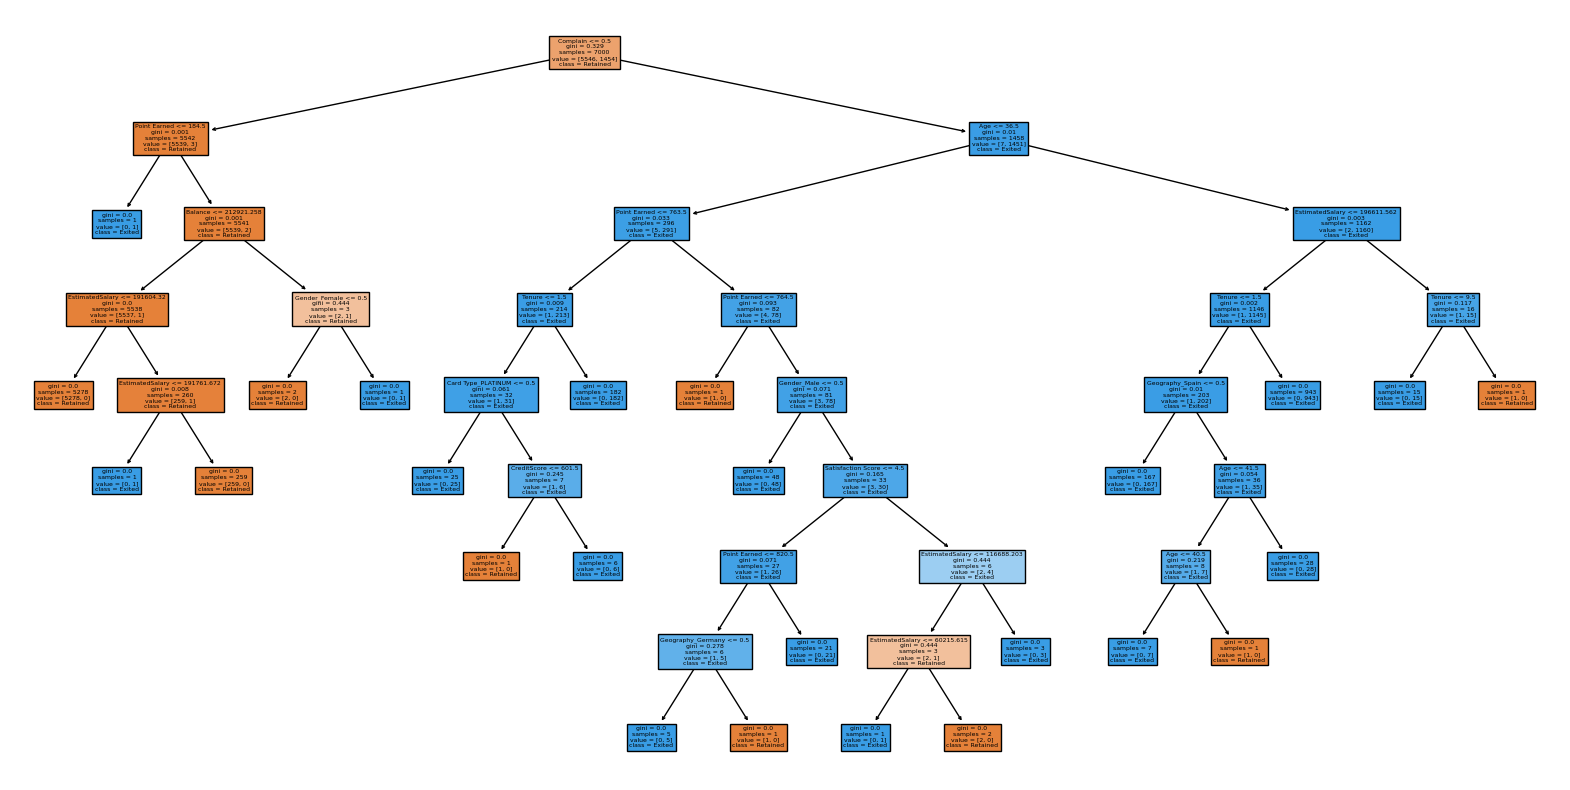

In [20]:
# prompt: Run a decision tree model on the train and test sets, print the accuracy, precision, ROC, then generate the decision tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_dt = dt_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_dt = metrics.precision_score(y_test, y_pred_dt)
roc_auc_dt = metrics.roc_auc_score(y_test, y_pred_dt)

# Print the results
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("ROC AUC:", roc_auc_dt)

# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Retained', 'Exited'], filled=True)
plt.show()


Random Forest Classifier:
Accuracy: 0.9986666666666667
Precision: 0.9948805460750854
ROC AUC: 0.9985229746892861

Decision Tree Classifier:
Accuracy: 0.9966666666666667
Precision: 0.9914383561643836
ROC AUC: 0.9946844098702712


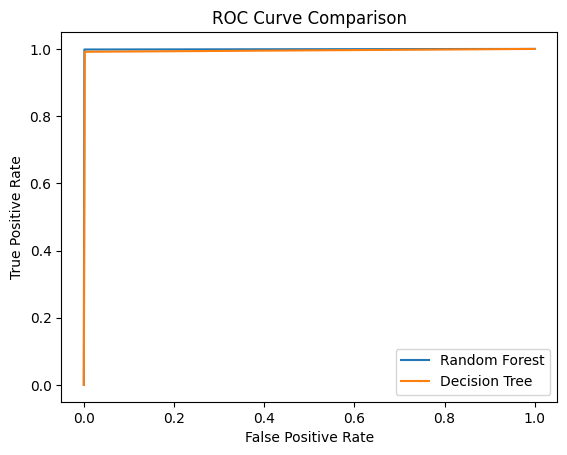

In [24]:
# prompt: Compare the performance of the random forest classifier with that of the decision tree classifier

import matplotlib.pyplot as plt
# Compare the accuracy, precision, and ROC AUC scores of the two models
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("ROC AUC:", roc_auc_dt)

# Import the required module
from sklearn.metrics import roc_curve
# Calculate the false positive rate (fpr) and true positive rate (tpr) for the decision tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

# Plot the ROC curves of the two models on the same graph
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

Accuracy: 0.7983333333333333
Precision: 0.4117647058823529
ROC AUC: 0.5274652998276331


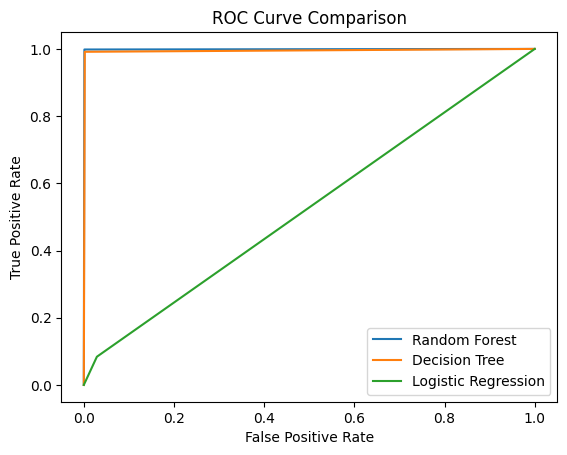

In [25]:
# prompt: Use the logistic regression to predict churn

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_lr = lr_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
roc_auc_lr = metrics.roc_auc_score(y_test, y_pred_lr)

# Print the results
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("ROC AUC:", roc_auc_lr)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

# Plot the ROC curves of the three models on the same graph
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
